In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import scipy
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
uploaded = files.upload()

Saving powerconsumption.csv to powerconsumption.csv


In [10]:
df = pd.read_csv('powerconsumption.csv')
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
Weekday = []
Day = []
Month = []
Year = []
Hour = []
Min = []

for i in range(len(df)):
  Weekday.append(df['Datetime'].iloc[i].weekday())
  Day.append(df['Datetime'].iloc[i].day)
  Month.append(df['Datetime'].iloc[i].month)
  Year.append(df['Datetime'].iloc[i].year)
  Hour.append(df['Datetime'].iloc[i].hour)
  Min.append(df['Datetime'].iloc[i].minute)

df['Weekday'] = Weekday
df['Day'] = Day
df['Month'] = Month
df['Year'] = Year
df['Hour'] = Hour
df['Minute'] = Min


In [ ]:
df.rename(columns={'WindSpeed': 'Wind', 'GeneralDiffuseFlows': 'GDF', 'DiffuseFlows': 'DF', 'PowerConsumption_Zone1': 'Zone1', 'PowerConsumption_Zone2': 'Zone2', 'PowerConsumption_Zone3': 'Zone3'}, inplace=True)


In [14]:
df['Total'] = df['Zone1']+df['Zone2']+df['Zone3']
df.head()

,Datetime,Temperature,Humidity,Wind,GDF,DF,Zone1,Zone2,Zone3,Weekday,Day,Month,Year,Hour,Minute,Total
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,6,1,1,2017,0,0,70425.53544
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,6,1,1,2017,0,10,69320.84387
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,6,1,1,2017,0,20,67803.22193
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,6,1,1,2017,0,30,65489.23209
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,6,1,1,2017,0,40,63650.44627


In [27]:
df['Time'] = [1]*len(df)
for i in range(len(df)):
  df['Time'].iloc[i] = df['Hour'].iloc[i]+round(df['Minute'].iloc[i]/60,2)

df['Time'] = df['Time'].astype('float')

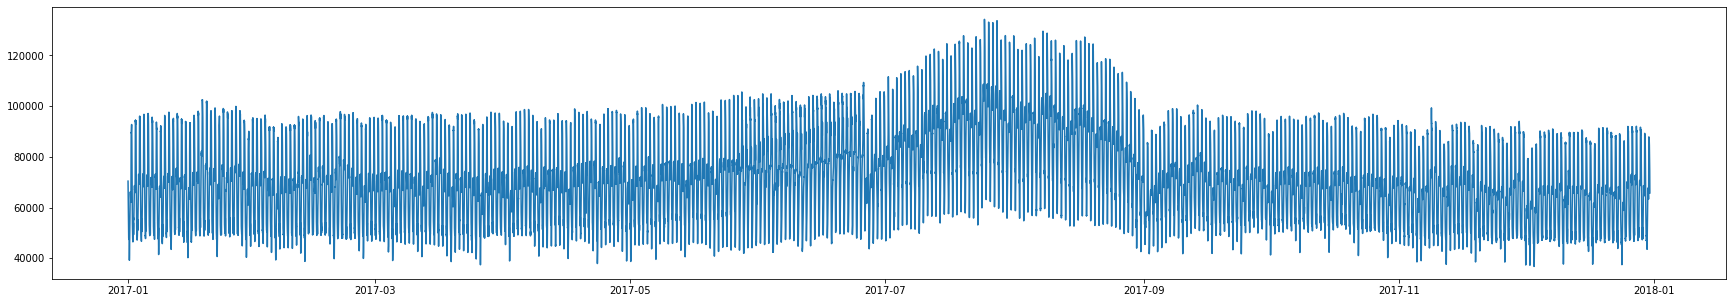

In [71]:
plt.figure(figsize=(30,5))

plt.plot(df['Datetime'], df['Total'])
plt.show()

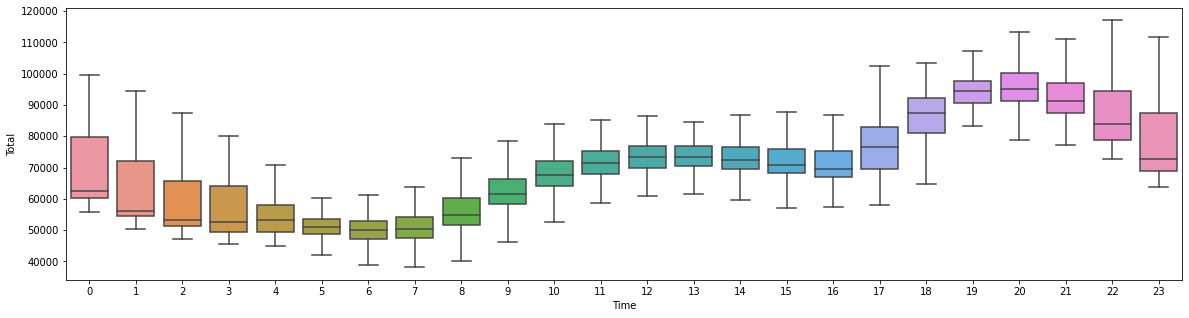

In [74]:
plt.figure(figsize=(20,5))
daily_df = df.groupby(['Year', 'Month', 'Day', 'Hour'], as_index=False).mean()

axi = sns.boxplot(x='Time', y='Total', data=daily_df, showfliers=False)
axi.set_xticklabels(axi.get_xticks())
# ax.figure.autofmt_xdate()
plt.show()

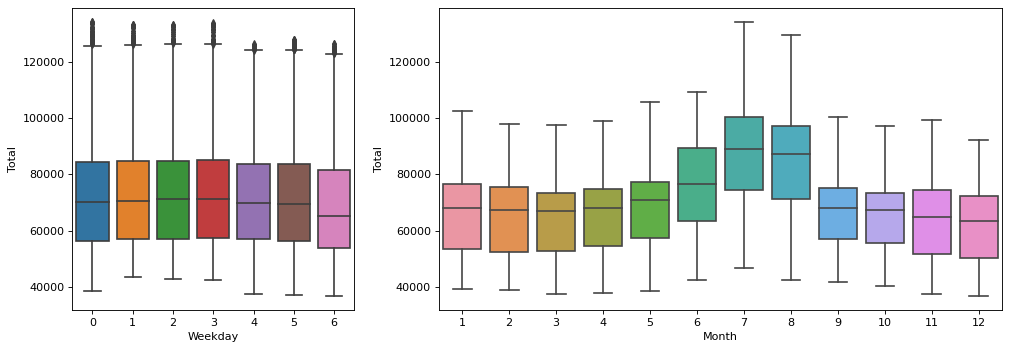

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), dpi= 80, gridspec_kw={'width_ratios': [1, 2]})
sns.boxplot(x='Weekday', y='Total', data=df, showfliers=True, ax=axes[0])
sns.boxplot(x='Month', y='Total', data=df, showfliers=True, ax=axes[1])

plt.show()

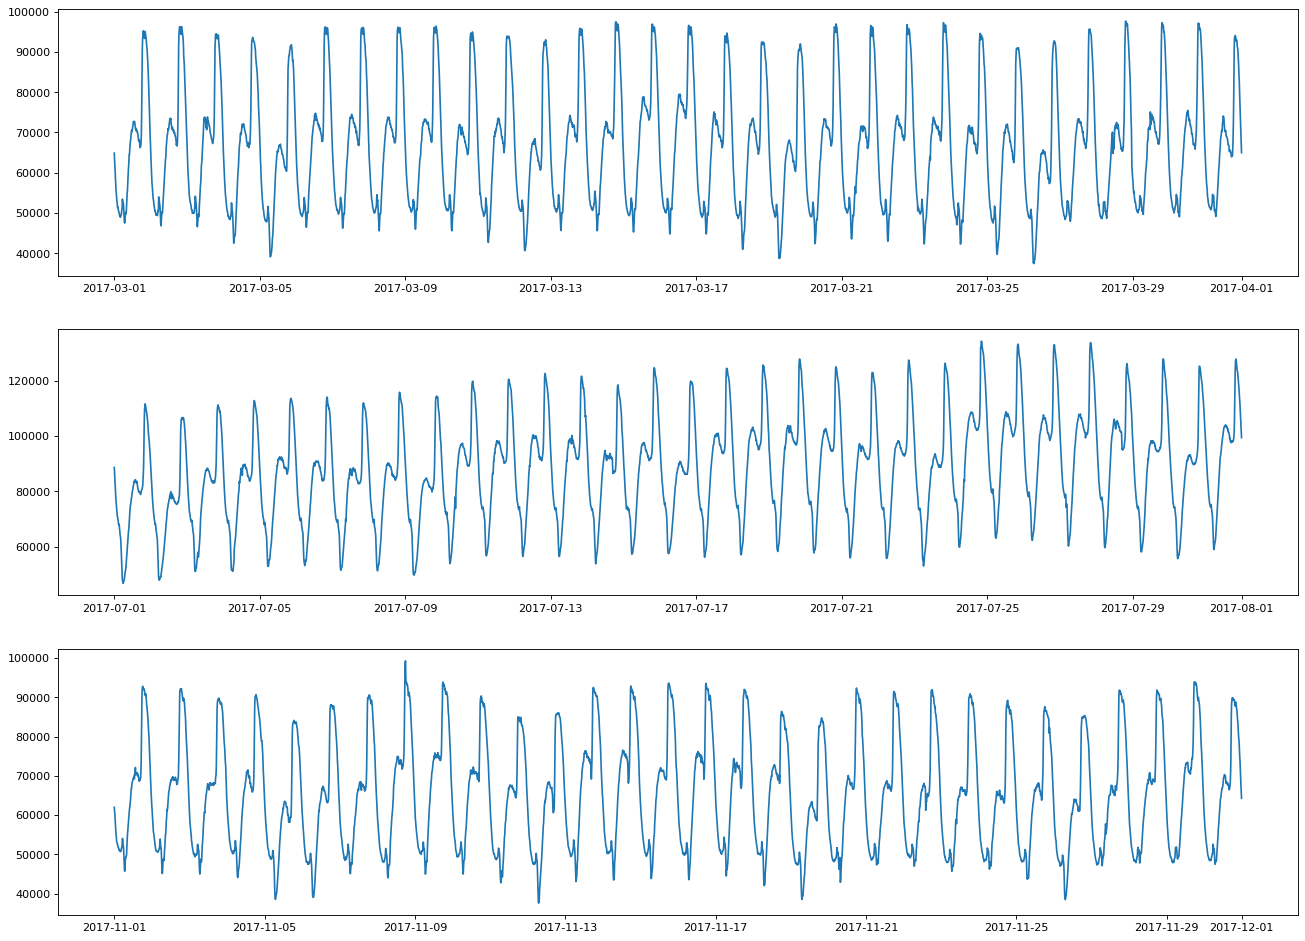

In [82]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
m = [3, 7, 11]
for i in range(3):
  sdf = df[(df['Month']==m[i])]
  axes[i].plot(sdf['Datetime'], sdf['Total'])

plt.show()